# Step 1: Undersatnding Business Problem

* identify relationship between total advertising spend and sales?
* our next ad campaign will have total spend of USD 200000, how many units do we expect to sell as a result of this? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Step 2: Data Undersatanding

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   TV         200 non-null    int64
 1   radio      200 non-null    int64
 2   newspaper  200 non-null    int64
 3   sales      200 non-null    int64
dtypes: int64(4)
memory usage: 6.4 KB


In [4]:
df['total_spend']= df['TV']+df['radio']+df['newspaper']
df.head()

,TV,radio,newspaper,sales,total_spend
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [5]:
df.drop(columns=['TV', 'radio', 'newspaper'],inplace=True )
df.head()

,sales,total_spend
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


# Step 3: Data Preprocessing

*** 3.1 Exploratory Data Analysis***
* Is there a relationship between ads and sales
* How strong is that relationship
* Given ad spending, can sales be predicted

In [6]:
df.describe()

,sales,total_spend
count,200.000000,200.000000
mean,14022.500000,200860.500000
std,5217.456566,92985.180587
min,1600.000000,11700.000000
25%,10375.000000,123550.000000
50%,12900.000000,207350.000000
75%,17400.000000,281125.000000
max,27000.000000,433600.000000


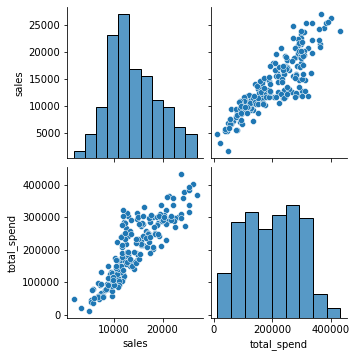

In [7]:
sns.pairplot(df)
plt.show()

As we can see in pair plot 2.2
* Is there a relationship between ads and sales

it is linear : as spend increases sales also increases


* How strong is that relationship

Covariance +ve
slope +ve
Direction +ve

* Given ad spending, can sales be predicted


In [8]:
df.corr()

,sales,total_spend
sales,1.000000,0.867712
total_spend,0.867712,1.000000


correlation is strong which means they are dependent

***3.2 Data cleaning***

In [9]:
df.isnull().sum()

sales          0
total_spend    0
dtype: int64

***3.3 Data Wrangling***

As there is no missing value and we are not considering outliers now so no encoding is required for now

***3.4 Train-Test_Split***

In [10]:
#create x and y
# take only one variable for now (SLR)
X= df.drop(columns='sales') # or x= df([['total_spend']])
y= df['sales']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)



Here 70% of the records are for training and 30% records are for testing

# Step 4: Modelling 

In [20]:
#import
from sklearn.linear_model import LinearRegression


In [22]:
#save the model

SP = LinearRegression()

In [23]:
#fit
SP.fit(X_train,y_train)

LinearRegression()

In [ ]:
#print Slope (B1) and intercept (Bo)

In [24]:
SP.intercept_

4087.9452797164704

In [25]:
SP.coef_

array([0.04948923])

# Predictions

In [26]:
train_prediction = SP.predict(X_train)

In [27]:
test_prediction = SP.predict(X_test)

# Step 5: Evaluation

In [31]:
from sklearn.metrics import mean_absolute_error
print("MAE for test data: ", mean_absolute_error(y_test, test_prediction))
print("MAE for train data: ", mean_absolute_error(y_train, train_prediction))

MAE for test data:  2075.674168607701
MAE for train data:  1895.8185640161516


In [30]:
from sklearn.metrics import mean_squared_error
print("MSE for test data: ", mean_squared_error(y_test, test_prediction))
print("MSE for train data: ", mean_squared_error(y_train, train_prediction))

MSE for test data:  7007533.107277555
MSE for train data:  6565027.086188398


In [33]:
#For RMSE we will sqrt MSE
print("RMSE for test data: ", np.sqrt(mean_squared_error(y_test, test_prediction)))
print("RMSE for train data: ", np.sqrt(mean_squared_error(y_train, train_prediction)))

RMSE for test data:  2647.1745517206746
RMSE for train data:  2562.2308807342865


In [34]:
from sklearn.metrics import r2_score
print("R2 for test data: ", r2_score(y_test, test_prediction))
print("R2 for train data: ", r2_score(y_train, train_prediction))

R2 for test data:  0.7227843629647372
R2 for train data:  0.7629916752365863


In [35]:
#test R2

SP.score(X_test,y_test)

0.7227843629647372

In [36]:
#train R2

SP.score(X_train,y_train)

0.7629916752365863

# Checklist

* Check if model has overfitting or underfitting problem
* Is test accuracy = cross validation score
* check if model meets the business problem requirements
* Save the model and share it with deployment team

***for Linear Regression, We have to check Assumptions***

* Check assumption (if it is Linear regression)

***1. Check if model has overfitting or underfitting problem?***

* R2 train is similar to R2 test
i.e 76.29  and 72.27

* it is a good model

***2. Is test accuracy = cross validation score?***

In [41]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(SP,X,y,cv=5)  #cv=KFold by default it is 5
print (scores)


cv_scores= scores.mean()
print ("Cross validation Score is: ", cv_scores)

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross validation Score is:  0.7433783178555419


## 3. Check for Assumptions (only for LR)

***3.1 Linearity of errors***

In [43]:
test_res = y_test - test_prediction

<function matplotlib.pyplot.show(close=None, block=None)>

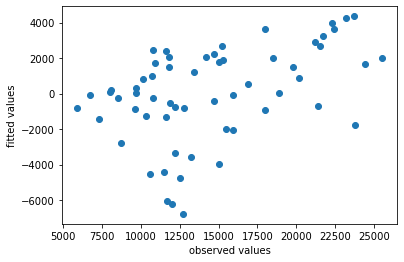

In [44]:
plt.scatter(y_test, test_res)
plt.xlabel('observed values')
plt.ylabel('fitted values')
plt.show

***3.2 Normality of errors***

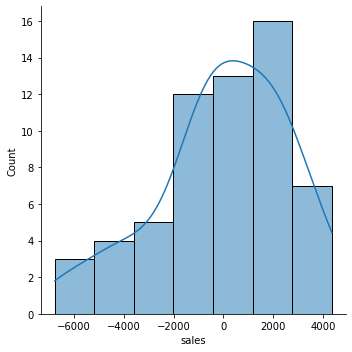

In [45]:
sns.displot(test_res, kde=True)
plt.show()

***3.3 Equal Variance of errors***

<function matplotlib.pyplot.show(close=None, block=None)>

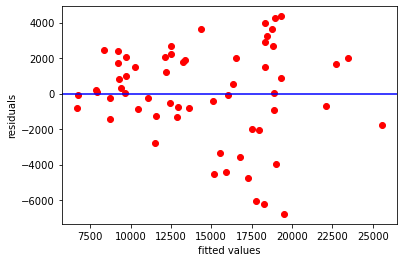

In [49]:
plt.scatter(test_prediction, test_res, c="r")
plt.axhline(y=0, color='blue')
plt.xlabel('fitted values')
plt.ylabel('residuals')
plt.show

***3.4 Variable significance***

In [54]:
import statsmodels.formula.api as smf
model=smf.ols("y~X", data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     603.4
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           5.06e-62
Time:                        19:16:13   Log-Likelihood:                -1855.4
No. Observations:                 200   AIC:                             3715.
Df Residuals:                     198   BIC:                             3721.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4243.0282    438.525      9.676      0.000    3378.249    5107.807
X              0.0487      0.002     24.564      0.000       0.045       0.053
==============================================================================
Omnibus:                        6.851   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.692
Skew:                          -0.373   Prob(JB):                       0.0352
Kurtosis:                       3.495   Cond. No.                     5.28e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Step 6: Final inferences

* our next ad campaign will have total spend of USD 200000, how many units do we expect to sell as a result of this? 

In [57]:
#use the model for prediction of new values
SP.predict([[321400]])

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19993.78260143])

## Save Model

In [58]:
from joblib import dump

dump(SP, 'Sales_model.joblib')

['Sales_model.joblib']

## Load a Model

In [59]:
from joblib import load

Sales_Prediction = load('Sales_model.joblib')

In [60]:
Sales_Prediction.predict([[321400]])

E:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([19993.78260143])